# Construction of continous acoustic data from discrete AE signals and noise (artificial/experimental)

In [1]:
# Dependencies
import pickle
import numpy as np
import obspy
import tqdm
import matplotlib.pyplot as plt
from obspy import UTCDateTime

%matplotlib inline

### Load and concatenate streams

In [2]:
# Arguments 
folder = "data/Fatigue_INSA/"
files_name = "7075_APT_-1_2"
files_ids = ["1","3","5","9","14"]
channel = "3"
files_suffix = "0-50"

Load stream 1


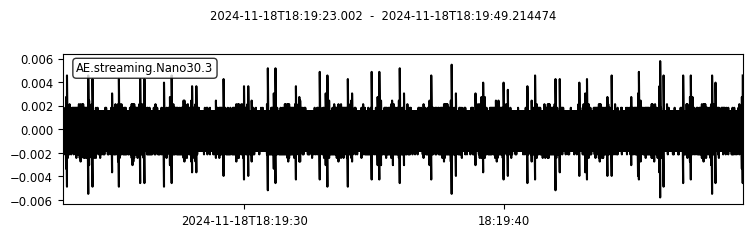

Load stream 3


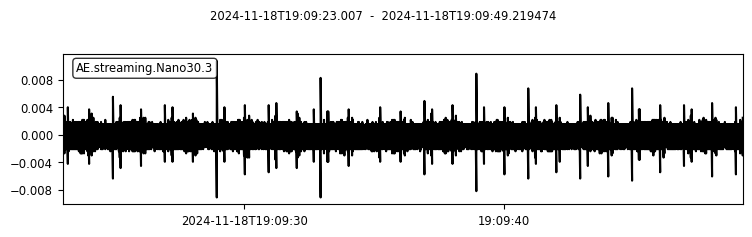

Load stream 5


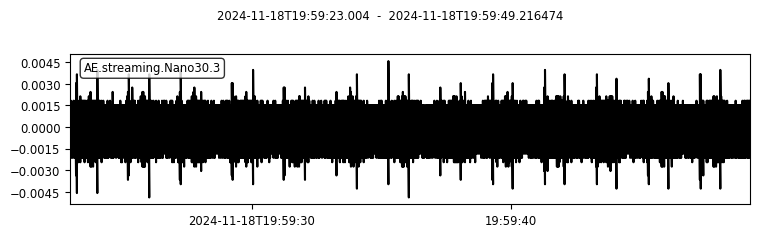

Load stream 9


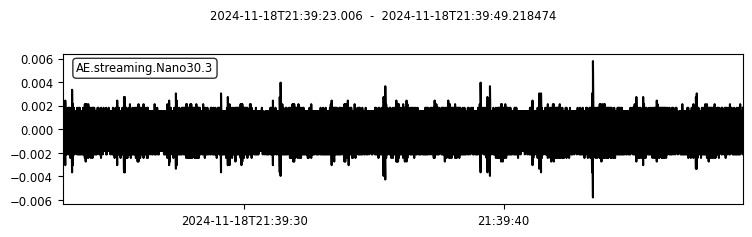

Load stream 14


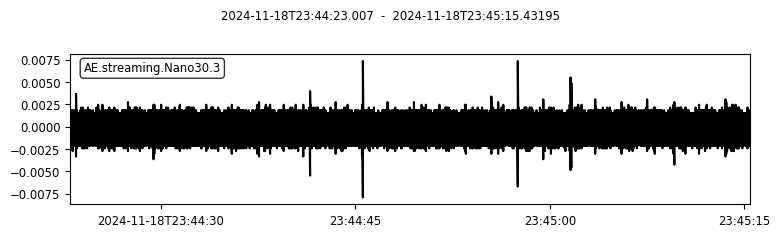

In [3]:
data = []
for f in files_ids:
    print("Load stream "+f)
    datapath = folder+"Stream_"+files_name+"_"+f+"_ch"+channel+"_"+files_suffix+".pkl"
    stream = pickle.load(open(datapath,'rb'))
    stream.plot()
    data = data+list(stream[0][:])     # Concatenate in data

# Collecting general info
sampling = stream[0].stats.sampling_rate
sensor = stream[0].stats.location
init_time = UTCDateTime(str(stream[0].stats.starttime))

# Get numpy array
data = np.array(data)

### Compute stream signal 

/home/delaselt/miniconda3/envs/scatnet_env/lib/python3.12/site-packages/obspy/imaging/util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/delaselt/miniconda3/envs/scatnet_env/lib/python3.12/site-packages/obspy/imaging/waveform.py:815: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


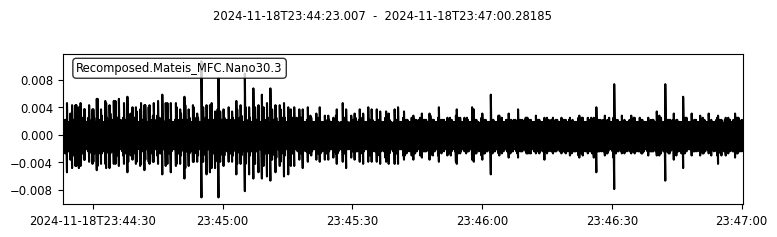

/home/delaselt/miniconda3/envs/scatnet_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


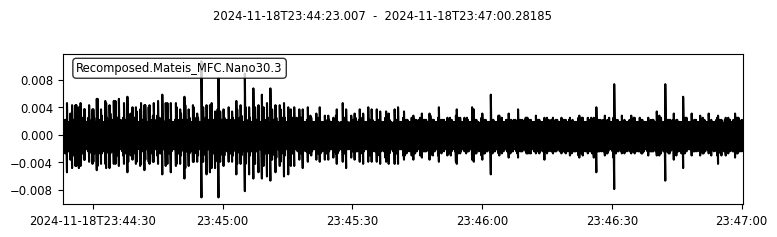

In [4]:
# Obspy stream header definition
header = {
    "sampling_rate": sampling,
    "npts": data.shape[0],
    "starttime": init_time,
    "delta": 1.0 / sampling,
    "network": "Recomposed",
    "station": "Mateis_MFC",
    "location": sensor,
    "channel": channel,
}

# Build stream
full_stream = obspy.Stream()
full_stream.append(obspy.Trace(data=data, header=header))

# Control stream 
plt.close()
full_stream.plot() # if needed ; could be long

## Downsampling (for high speed computation)

         network: Recomposed
         station: Mateis_MFC
        location: Nano30
         channel: 3
       starttime: 2024-11-18T23:44:23.007000Z
         endtime: 2024-11-18T23:47:00.281850Z
   sampling_rate: 2000000.0
           delta: 5e-07
            npts: 314549700
           calib: 1.0
      processing: ["ObsPy 1.4.1: filter(options={'freq': 1000000.0, 'maxorder': 12}::type='lowpass_cheby_2')", 'ObsPy 1.4.1: decimate(factor=1::no_filter=False::strict_length=False)']


/home/delaselt/miniconda3/envs/scatnet_env/lib/python3.12/site-packages/obspy/imaging/util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/delaselt/miniconda3/envs/scatnet_env/lib/python3.12/site-packages/obspy/imaging/waveform.py:815: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


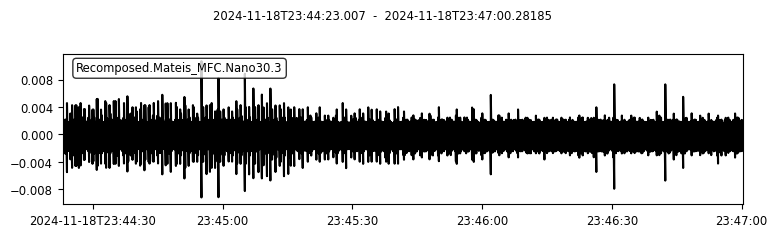

/home/delaselt/miniconda3/envs/scatnet_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


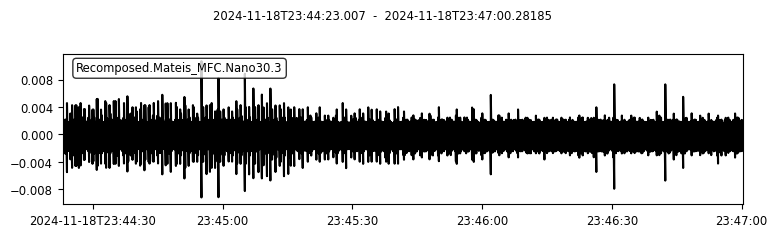

In [5]:
downsampling_factor = 1
stream_down = obspy.Stream()
stream_down.append(full_stream[0].copy())
stream_down[0] = stream_down[0].decimate(factor=downsampling_factor, strict_length=False)

# Stream stats update
stream_down[0].stats.sampling_rate = sampling/downsampling_factor
stream_down[0].stats.delta = 1.0 / sampling*downsampling_factor
stream_down[0].stats.npts = len(stream_down[0])

print(stream_down[0].stats)
stream_down[0].plot()

## Saving procedure

In [6]:
# Save parameters
savepath = folder+"streams_assembly/"
filepath = savepath+"Stream_"+files_name+"_"+"".join(files_ids)+"_ch"+channel+"_"+files_suffix
Format = "pkl"
print("Stream is going to be saved in "+filepath+"."+Format)

Stream is going to be saved in data/Fatigue_INSA/streams_assembly/Stream_7075_APT_-1_2_135914_ch3_0-50.pkl


In [7]:
if Format == "pkl":
    # Save obspy stream (serialized with pickle)
    with open(filepath+".pkl", "wb") as file:
        pickle.dump(stream_down, file, protocol=pickle.HIGHEST_PROTOCOL)
else :
    # Save obspy stream (mseed)
    stream_down.write(filepath+".mseed", format="MSEED")
    
print(f"Stream saved in format",Format)

Stream saved in format pkl
